# Forest Cover Type

### Each group should show their results (summary charts) concerning the topics listed for each week for the 1st dataset in the project, at their lab. Evaluation points:
- Week 3 (Sep 30th) - Univariate analysis
- Week 4 (Oct 7th) - Multivariate analysis
- Week 5 (Oct 14th) - Naive Bayes and KNN
- Week 6 (Oct 21st) - Decision trees
- Week 7 (Oct 28th) - Ensembles
- Week 8 (Nov 4th) - Pattern Mining
- Week 9 (Nov 11th) - Clustering
#### The evaluations on the last  three labs will cover the topics exercised during the class:
- Week 11 (Nov 25th) - Regression
- Week 12 (Dec 2nd) - Time series data analysis
- Week 13 (Dec 9th) - Forecasting
- Extra mark - Biclustering ( if you miss any previous point) 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Column names extracted from the dataset description file
cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
         "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
         "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
         "Horizontal_Distance_To_Fire_Points"] + \
       ["Wilderness_Area_{}".format(i) for i in range(4)] + \
       ["Soil_Type {}".format(i) for i in range(40)] + \
       ["Cover_Type"]

#import data Forest Cover Type
data = pd.read_csv("dataset/covtype.data", index_col=None, names=cols)

# Forest Cover Type Classes      1 -- Spruce/Fir
#                                2 -- Lodgepole Pine
#                                3 -- Ponderosa Pine
#                                4 -- Cottonwood/Willow
#                                5 -- Aspen
#                                6 -- Douglas-fir
#                                7 -- Krummholz

## 1. Statistical description (5%)
The students should perform a statistical analysis of the datasets in advance and summarize relevant
implications in the report, such as the underlying distributions and hypothesized forms feature dependency.

In [452]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [371]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [372]:
data.shape

(581012, 55)

In [373]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_0                     int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Soil_Type 0                           int64
Soil_Type 1                           int64
Soil_Type 2                           int64
Soil_Type 3                           int64
Soil_Type 4                           int64
Soil_Type 5                           int64
Soil_Type 6                           int64
Soil_Type 7                           int64
Soil_Type 8                     

### The dataset is tabular with high amount of records and 53 variables, plus one class variable. Wilderness_Area and Soil_Type are binary variables. All variables are int64. The class variable has a value from 1 to 7, each corresponding with a type of forest cover type: 

1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz



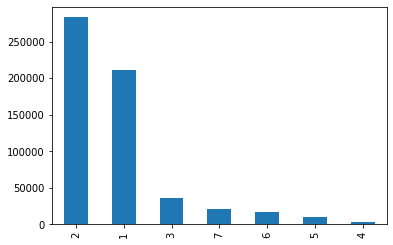

In [374]:
#distribution of classes
data['Cover_Type'].value_counts().plot(kind='bar')

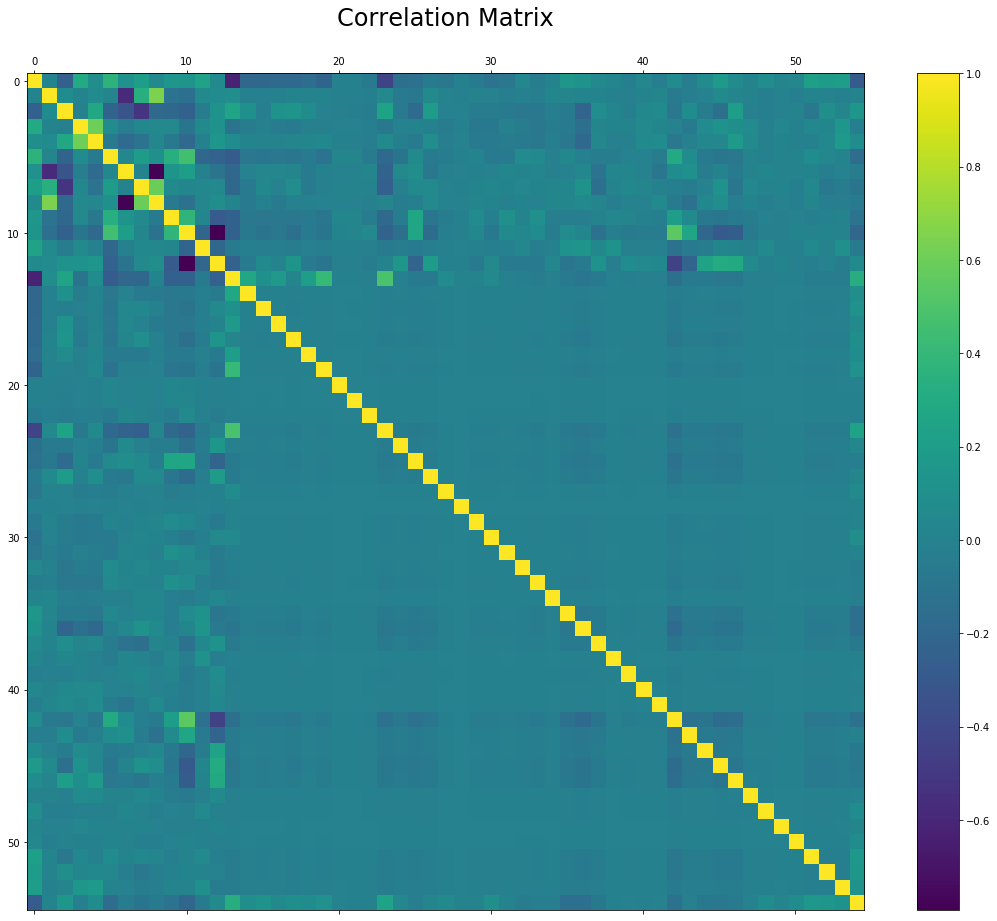

In [375]:
#heatmap with correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=24);

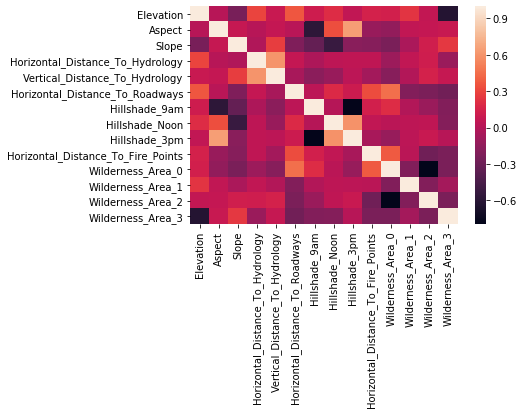

In [376]:
#look at heatmap of first 10 variables
Sdata = data.iloc[:,0:14]
corr = Sdata.corr()
sns.heatmap(corr)

Text(0.5, 0, 'Horizontal_Distance_To_Fire_Points')

<Figure size 432x288 with 0 Axes>

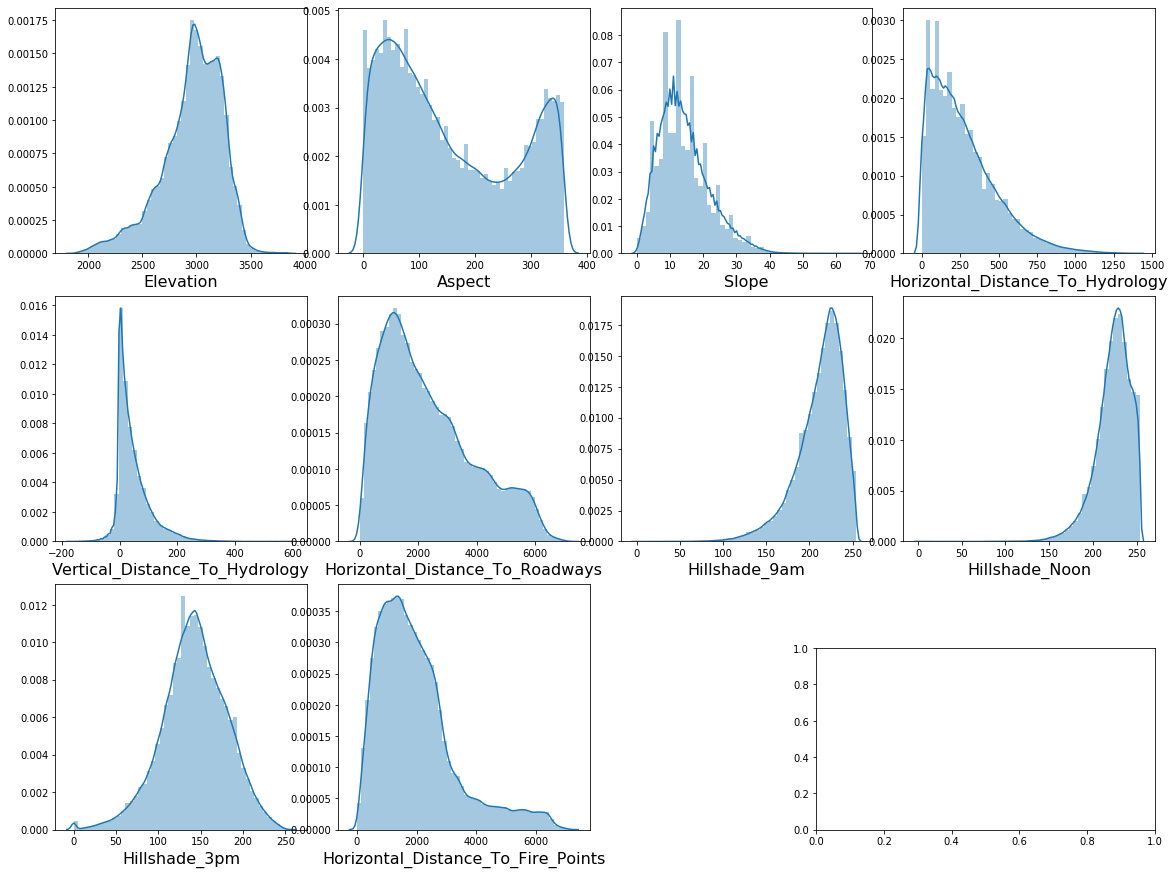

In [56]:
#look at distribution of first 10 variables
from pylab import *

plt.figure()
fig, axs = plt.subplots(4,3, figsize=(4*4, 3*4), squeeze=False)
fig.tight_layout()

subplot(3,4,1)
sns.distplot(data['Elevation'])
plt.xlabel('Elevation', fontsize=16)

subplot(3,4,2)
sns.distplot(data['Aspect'])
plt.xlabel('Aspect', fontsize=16)

subplot(3,4,3)
sns.distplot(data['Slope'])
plt.xlabel('Slope', fontsize=16)

subplot(3,4,4)
sns.distplot(data['Horizontal_Distance_To_Hydrology'])
plt.xlabel('Horizontal_Distance_To_Hydrology', fontsize=16)

subplot(3,4,5)
sns.distplot(data['Vertical_Distance_To_Hydrology'])
plt.xlabel('Vertical_Distance_To_Hydrology', fontsize=16)

subplot(3,4,6)
sns.distplot(data['Horizontal_Distance_To_Roadways'])
plt.xlabel('Horizontal_Distance_To_Roadways', fontsize=16)

subplot(3,4,7)
sns.distplot(data['Hillshade_9am'])
plt.xlabel('Hillshade_9am', fontsize=16)

subplot(3,4,8)
sns.distplot(data['Hillshade_Noon'])
plt.xlabel('Hillshade_Noon', fontsize=16)

subplot(3,4,9)
sns.distplot(data['Hillshade_3pm'])
plt.xlabel('Hillshade_3pm', fontsize=16)

subplot(3,4,10)
sns.distplot(data['Horizontal_Distance_To_Fire_Points'])
plt.xlabel('Horizontal_Distance_To_Fire_Points', fontsize=16)

### The amount of instances classified as 1 and 2 are significantly higher than the rest of the classes. 

### From the heatmap can be seen that only the first 10 variables are interesting to look at. When taking a closer look some variables are highly negatively correlated.

### Looking at the distribution of the frist 10 variables tells us that there are the Aspects are widely spread but the distribution of all other variables peaks at a certain point.

## 2. Preprocessing (20%)
In accordance with the properties of the input dataset and the behavior of the target learning algorithm,
the students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its
potential impact on learning. 

In [378]:
#check missing values
data.isna().sum().sum()

0

### Need to over/under sample data to get more even distribution


In [379]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [113]:
# Subsample all classes to 10k
class_size= 10000

BData = data.groupby("Cover_Type").apply(lambda x: x.sample(min(class_size, len(x)))).reset_index(1)
BData = BData.drop(columns=["Cover_Type"]).reset_index().drop(columns=["level_1"])

In [659]:
BData.head()

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type 30,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39
0,1,3140,45,8,234,2,837,222,223,136,...,0,0,0,0,0,0,0,0,0,0
1,1,3104,343,17,108,17,3507,183,212,166,...,0,0,0,0,0,0,0,0,0,0
2,1,3164,262,10,371,69,4286,194,246,190,...,0,0,0,0,0,0,0,0,0,0
3,1,3210,296,13,636,63,2661,183,236,193,...,0,0,0,0,0,0,0,0,0,0
4,1,2975,90,16,283,72,4436,243,213,96,...,0,0,0,0,0,0,0,0,0,0


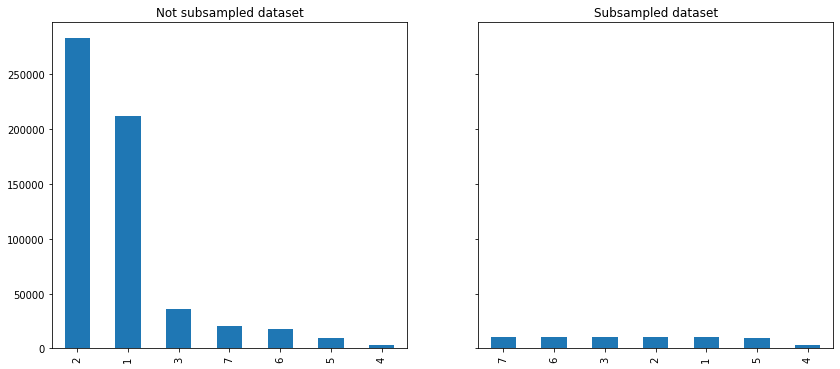

In [381]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,6))
data.Cover_Type.value_counts().plot(kind="bar", ax=ax1, title="Not subsampled dataset")
BData.Cover_Type.value_counts().plot(kind="bar", ax=ax2, title="Subsampled dataset")
plt.show()

In [114]:
X = BData
y = BData['Cover_Type']
#y = pd.Dataframe(y, columns='Cover_Type')
labels = data.columns

#X = X.drop(columns='Cover_Type')

In [115]:
X

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type 30,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39
0,1,3218,347,24,108,36,2724,168,194,159,...,0,0,0,0,0,0,0,0,0,0
1,1,3054,344,20,443,67,3469,177,206,165,...,0,0,0,0,0,0,0,0,1,0
2,1,3078,86,15,30,0,1123,241,214,99,...,0,0,0,0,0,0,0,0,0,0
3,1,2913,34,10,60,7,636,219,218,134,...,0,0,0,0,0,0,0,0,0,0
4,1,3179,38,16,0,0,1634,218,203,115,...,1,0,0,0,0,0,0,0,0,0
5,1,3196,185,9,283,37,914,222,246,158,...,0,0,0,0,0,0,0,0,0,0
6,1,3174,324,17,0,0,3729,175,220,183,...,0,0,0,0,0,0,0,0,0,0
7,1,3064,225,6,760,89,5738,212,246,171,...,0,0,0,0,0,0,0,0,0,0
8,1,3165,187,12,127,7,2325,221,249,159,...,0,0,0,0,0,0,0,0,0,0
9,1,3208,232,29,210,126,2698,161,251,215,...,0,0,1,0,0,0,0,0,0,0


In [117]:
# Prepare dataset in test and train sets
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB





# when using classifiers
#y: np.ndarray = BData.pop('Cover_Type').values
#X: np.ndarray = BData.values
#labels = pd.unique(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [118]:
X_train = pd.DataFrame(X_train, columns=BData.columns).drop(columns='Cover_Type')
X_test = pd.DataFrame(X_test, columns=BData.columns).drop(columns='Cover_Type')

## 3. Unsupervised
### a. Association Rules (7.5%)
### b.Clustering (7.5%)
Unsupervised exploration must be done through clustering and association rule mining. Class attributes
should not be used to explore the data, unless there is a well substantiated interest for mining classconditional data or discovering association rules with classes in the antecedent/consequent. Nevertheless,
class attributes may be used to objectively assess clustering results and evaluate the discriminative power
of certain association rules. Besides this, statistical evaluation must be performed using the studied indexes.

In [192]:
# Feature selection, select all numerical features

X_PM = X_train.loc[:,'Soil_Type 0':'Soil_Type 39']
X_PM.head(5)

,Soil_Type 0,Soil_Type 1,Soil_Type 2,Soil_Type 3,Soil_Type 4,Soil_Type 5,Soil_Type 6,Soil_Type 7,Soil_Type 8,Soil_Type 9,...,Soil_Type 30,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39
39988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45123,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
for col in X_PM.columns: 
    if "Soil" in col:
        print(X_PM.loc[:,col].value_counts())


0    51881
1     1023
Name: Soil_Type 0, dtype: int64
0    50717
1     2187
Name: Soil_Type 1, dtype: int64
0    51321
1     1583
Name: Soil_Type 2, dtype: int64
0    50041
1     2863
Name: Soil_Type 3, dtype: int64
0    52368
1      536
Name: Soil_Type 4, dtype: int64
0    50993
1     1911
Name: Soil_Type 5, dtype: int64
0    52902
1        2
Name: Soil_Type 6, dtype: int64
0    52898
1        6
Name: Soil_Type 7, dtype: int64
0    52861
1       43
Name: Soil_Type 8, dtype: int64
0    45054
1     7850
Name: Soil_Type 9, dtype: int64
0    51424
1     1480
Name: Soil_Type 10, dtype: int64
0    51942
1      962
Name: Soil_Type 11, dtype: int64
0    51068
1     1836
Name: Soil_Type 12, dtype: int64
0    52597
1      307
Name: Soil_Type 13, dtype: int64
0    52902
1        2
Name: Soil_Type 14, dtype: int64
0    52596
1      308
Name: Soil_Type 15, dtype: int64
0    51477
1     1427
Name: Soil_Type 16, dtype: int64
0    52716
1      188
Name: Soil_Type 17, dtype: int64
0    52709
1      19

In [214]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelBinarizer

frequent_itemsets = {}
minpaterns = 20
minsup = 0.8
classrules = None
while minsup > 0:    
    minsup = minsup * 0.9
    frequent_itemsets = apriori(X_PM, min_support=minsup, use_colnames=True, verbose=0)
    if len(frequent_itemsets) <1:
        continue
    
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    
    print("Minsup {} found {} patterns out of which contain class consequent"
          .format(minsup, len(frequent_itemsets)))
    
    if len(frequent_itemsets) >= minpaterns:
        print("Minimum support:", minsup)
        print("Number of found patterns:", len(frequent_itemsets))
        break

Minsup 0.14824161510814737 found 1 patterns out of which contain class consequent
Minsup 0.13341745359733265 found 1 patterns out of which contain class consequent
Minsup 0.12007570823759939 found 1 patterns out of which contain class consequent
Minsup 0.10806813741383946 found 1 patterns out of which contain class consequent
Minsup 0.09726132367245552 found 1 patterns out of which contain class consequent
Minsup 0.08753519130520997 found 2 patterns out of which contain class consequent
Minsup 0.07878167217468897 found 2 patterns out of which contain class consequent
Minsup 0.07090350495722007 found 2 patterns out of which contain class consequent
Minsup 0.06381315446149807 found 2 patterns out of which contain class consequent
Minsup 0.05743183901534827 found 2 patterns out of which contain class consequent
Minsup 0.051688655113813445 found 6 patterns out of which contain class consequent
Minsup 0.0465197896024321 found 8 patterns out of which contain class consequent
Minsup 0.0418678

In [217]:
rules.sort_values(by="confidence", ascending=False)[["antecedents", "consequents", "confidence"]].head()

,antecedents,consequents,confidence


# Takes very long to find rules for binary classes

In [121]:
# numerical values first 10 rows
XN_PM = X_train.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
XN_PM.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
39988,2872,117,31,256,139,2071,254,195,43,511
45123,2124,318,31,67,41,774,127,197,202,920
2886,3204,170,20,120,24,3511,230,244,136,3062
58173,3385,336,9,949,135,1205,199,227,167,1909
56735,3261,351,10,0,0,3150,202,223,159,2583


In [122]:
#Discretize
for col in XN_PM:
    XN_PM[col] = pd.cut(XN_PM[col],3, labels=np.arange(3))
XN_PM.head(5)

C:\Users\roosw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
39988,1,0,1,0,1,0,2,1,0,0
45123,0,2,1,0,0,0,1,2,2,0
2886,2,1,1,0,0,1,2,2,1,1
58173,2,2,0,2,1,0,2,2,2,0
56735,2,2,0,0,0,1,2,2,1,1


In [123]:
# Dummify
dummylist = []
for att in XN_PM:
    dummylist.append(pd.get_dummies(XN_PM[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

,Elevation_0,Elevation_1,Elevation_2,Aspect_0,Aspect_1,Aspect_2,Slope_0,Slope_1,Slope_2,Horizontal_Distance_To_Hydrology_0,...,Hillshade_9am_2,Hillshade_Noon_0,Hillshade_Noon_1,Hillshade_Noon_2,Hillshade_3pm_0,Hillshade_3pm_1,Hillshade_3pm_2,Horizontal_Distance_To_Fire_Points_0,Horizontal_Distance_To_Fire_Points_1,Horizontal_Distance_To_Fire_Points_2
39988,0,1,0,1,0,0,0,1,0,1,...,1,0,1,0,1,0,0,1,0,0
45123,1,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
2886,0,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
58173,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,1,0,0
56735,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [124]:
minsup = 0.35 #you can also use iteratively decreasing support as in the previous example
frequent_itemsets = apriori(dummified_df, min_support=minsup, use_colnames=True)

minconf = 0.9
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[(rules['antecedent_len']>=2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
9,"(Elevation_1, Horizontal_Distance_To_Hydrology_0)",(Hillshade_9am_2),0.425885,0.891124,0.399648,0.938396,1.053048,0.020133,1.767360,2
10,"(Elevation_1, Hillshade_Noon_2)",(Hillshade_9am_2),0.432822,0.891124,0.407096,0.940562,1.055479,0.021398,1.831780,2
11,"(Elevation_1, Horizontal_Distance_To_Fire_Poin...",(Hillshade_9am_2),0.385150,0.891124,0.359633,0.933746,1.047830,0.016416,1.643309,2
12,"(Horizontal_Distance_To_Hydrology_0, Aspect_0)",(Hillshade_9am_2),0.408211,0.891124,0.404336,0.990508,1.111527,0.040570,11.469736,2
13,"(Aspect_0, Hillshade_Noon_2)",(Hillshade_9am_2),0.352809,0.891124,0.352809,1.000000,1.122179,0.038413,inf,2
14,"(Aspect_0, Hillshade_3pm_1)",(Hillshade_9am_2),0.370331,0.891124,0.366551,0.989792,1.110723,0.036540,10.665538,2
15,"(Horizontal_Distance_To_Fire_Points_0, Aspect_0)",(Hillshade_9am_2),0.374131,0.891124,0.370199,0.989491,1.110386,0.036802,10.360537,2
16,"(Slope_0, Vertical_Distance_To_Hydrology_0)",(Horizontal_Distance_To_Hydrology_0),0.486258,0.844397,0.444295,0.913703,1.082077,0.033700,1.803098,2
17,"(Slope_0, Horizontal_Distance_To_Hydrology_0)",(Hillshade_9am_2),0.515046,0.891124,0.512230,0.994532,1.116042,0.053260,19.910508,2
18,"(Slope_0, Horizontal_Distance_To_Hydrology_0)",(Hillshade_Noon_2),0.515046,0.850238,0.514989,0.999890,1.176012,0.077078,1360.236806,2


In [127]:
rules.sort_values(by=["confidence", "support"], ascending=False)[["antecedents", "consequents", "confidence"]].head(1).values

array([[frozenset({'Slope_0', 'Hillshade_3pm_1'}),
        frozenset({'Hillshade_9am_2'}), 1.0]], dtype=object)

# Pattern Mining / Association Rules

In [134]:
# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(f_classif, k=10).fit_transform(X_train, y_train)
KBestSelector = SelectKBest(f_classif).fit(X_train, y_train)
feature_scores = pd.DataFrame({"Feature": X_train.columns, "Scores": KBestSelector.scores_})
top20k = feature_scores.sort_values(by="Scores", ascending=False)["Feature"].iloc[:10].values

In [136]:
X_new = pd.DataFrame(X_new, columns=top20k)
X_new.head()

,Elevation,Wilderness_Area_3,Horizontal_Distance_To_Roadways,Soil_Type 9,Wilderness_Area_0,Soil_Type 37,Soil_Type 2,Horizontal_Distance_To_Fire_Points,Soil_Type 38,Soil_Type 39
0,2872,2071,511,0,0,0,0,0,0,0
1,2124,774,920,0,1,0,1,0,0,0
2,3204,3511,3062,1,0,0,0,0,0,0
3,3385,1205,1909,0,0,0,0,1,0,0
4,3261,3150,2583,0,0,0,0,0,0,0


In [585]:
# Trying both at the same time
# use on X_train

df = X_train
dummylist = []
for att in df:
    if att in ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
         "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
         "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
         "Horizontal_Distance_To_Fire_Points"]: 
        df[att] = pd.cut(df[att],3,labels=['0','1','2'])
        df.fillna('2', inplace = True)
    dummylist.append(pd.get_dummies(df[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

,Elevation_0,Elevation_1,Elevation_2,Aspect_0,Aspect_1,Aspect_2,Slope_0,Slope_1,Slope_2,Horizontal_Distance_To_Hydrology_0,...,Soil_Type 30,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39
53793,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9123,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24623,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27138,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28572,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [587]:
X_new = pd.DataFrame(X_new, columns=top20k)

In [591]:
X_new.shape

(52904, 10)

In [594]:
X_new = pd.get_dummies(X_new)
X_new = X_new.drop(columns='Soil_Type 39')
X_new.shape

(52904, 18)

In [595]:
X_new.head(5)

,Elevation_0,Elevation_1,Wilderness_Area_3_0,Wilderness_Area_3_1,Soil_Type 9_0,Soil_Type 9_1,Wilderness_Area_0_0,Wilderness_Area_0_1,Horizontal_Distance_To_Roadways_0,Horizontal_Distance_To_Roadways_1,Soil_Type 37_0,Soil_Type 37_1,Soil_Type 2_0,Soil_Type 2_1,Soil_Type 38_0,Soil_Type 38_1,Horizontal_Distance_To_Fire_Points_0,Horizontal_Distance_To_Fire_Points_1
0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
3,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [600]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelBinarizer

frequent_itemsets = {}
minpaterns = 2000
minsup = 0.8
classrules = None
while minsup > 0:    
    minsup = minsup * 0.9
    frequent_itemsets = apriori(X_new, min_support=minsup, use_colnames=True, verbose=0)
    
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
    classrules = rules[rules['consequents'] == {'class'}]
    
    print("Minsup {} found {} patterns out of which {} contain class consequent"
          .format(minsup, len(frequent_itemsets), len(classrules)))  
    
    if len(frequent_itemsets) >= minpaterns:
        print("Minimum support:", minsup)
        print("Number of found patterns:", len(frequent_itemsets))
        break

Minsup 0.7200000000000001 found 49 patterns out of which 0 contain class consequent
Minsup 0.6480000000000001 found 93 patterns out of which 0 contain class consequent
Minsup 0.5832000000000002 found 124 patterns out of which 0 contain class consequent
Minsup 0.5248800000000001 found 183 patterns out of which 0 contain class consequent
Minsup 0.47239200000000015 found 222 patterns out of which 0 contain class consequent
Minsup 0.42515280000000016 found 291 patterns out of which 0 contain class consequent
Minsup 0.3826375200000002 found 345 patterns out of which 0 contain class consequent
Minsup 0.3443737680000002 found 371 patterns out of which 0 contain class consequent
Minsup 0.30993639120000016 found 407 patterns out of which 0 contain class consequent
Minsup 0.27894275208000013 found 451 patterns out of which 0 contain class consequent
Minsup 0.2510484768720001 found 535 patterns out of which 0 contain class consequent
Minsup 0.2259436291848001 found 683 patterns out of which 0 con

In [118]:
'class' in rules.consequents.value_counts()

False

In [599]:
rules.sort_values(by="confidence", ascending=False)[["antecedents", "consequents", "confidence"]].head(40)

,antecedents,consequents,confidence
7684,"(Wilderness_Area_3_0, Horizontal_Distance_To_F...",(Soil_Type 37_0),1.0
6376,"(Soil_Type 37_1, Horizontal_Distance_To_Fire_P...","(Wilderness_Area_3_0, Horizontal_Distance_To_R...",1.0
11810,"(Wilderness_Area_3_0, Wilderness_Area_0_0, Soi...",(Soil_Type 38_0),1.0
6371,"(Soil_Type 37_1, Wilderness_Area_3_0, Horizont...",(Elevation_0),1.0
6372,"(Soil_Type 37_1, Wilderness_Area_3_0, Horizont...",(Horizontal_Distance_To_Roadways_0),1.0
6373,"(Soil_Type 37_1, Horizontal_Distance_To_Fire_P...",(Wilderness_Area_3_0),1.0
6374,"(Wilderness_Area_3_0, Soil_Type 37_1, Horizont...","(Horizontal_Distance_To_Roadways_0, Elevation_0)",1.0
6375,"(Horizontal_Distance_To_Roadways_0, Soil_Type ...","(Wilderness_Area_3_0, Elevation_0)",1.0
6377,"(Soil_Type 37_1, Horizontal_Distance_To_Fire_P...","(Wilderness_Area_3_0, Elevation_0, Horizontal_...",1.0
6385,"(Horizontal_Distance_To_Fire_Points_1, Soil_Ty...","(Wilderness_Area_3_0, Elevation_0)",1.0


# Try associationrules by first splitting the data and looking at certein class?

In [687]:
y_train_new = pd.DataFrame(y_train, columns=['Cover_Type'])

In [688]:
trainingset = np.hstack((y_train_new, X_train))
df = pd.DataFrame(trainingset,columns=BData.columns)


In [689]:
df.head()

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type 30,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39
0,2,2773,117,16,85,23,2018,245,224,103,...,1,0,0,0,0,0,0,0,0,0
1,1,2939,22,11,242,7,4622,213,217,139,...,0,0,0,0,0,0,0,0,0,0
2,3,2475,107,13,270,24,830,241,224,110,...,0,0,0,0,0,0,0,0,0,0
3,1,3199,291,10,108,15,4142,192,239,186,...,0,0,0,0,0,0,0,0,1,0
4,7,3281,162,25,228,97,1753,235,236,116,...,0,0,0,0,0,0,0,0,1,0


In [692]:
ds = {}
by_class = df.groupby('Cover_Type')

for groups, data in by_class:
    ds[groups] = data
    
# now we can search rules for one specific covertype by ds[1]

In [698]:
ds[1].head()

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type 30,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39
1,1,2939,22,11,242,7,4622,213,217,139,...,0,0,0,0,0,0,0,0,0,0
3,1,3199,291,10,108,15,4142,192,239,186,...,0,0,0,0,0,0,0,0,1,0
9,1,3180,59,1,30,0,4357,220,235,152,...,0,0,0,0,0,0,0,0,0,0
18,1,3190,81,9,228,11,5117,232,225,125,...,0,0,0,0,0,0,0,0,0,0
40,1,3229,26,19,150,37,1020,208,195,117,...,0,0,0,0,0,0,0,0,0,0


In [700]:
d1 = ds[1]

#X_new = SelectKBest(f_classif, k=10).fit_transform(X_train, y_train)
KBestSelector = SelectKBest(f_classif).fit(d1, columns='Cover_Type')
feature_scores = pd.DataFrame({"Feature": d1.columns, "Scores": KBestSelector.scores_})
top20k = feature_scores.sort_values(by="Scores", ascending=False)["Feature"].iloc[:10].values

TypeError: fit() got an unexpected keyword argument 'columns'

## 4. Classification
### a. Naïve Bayes (2%)
### b. Instance-based Learning (3%)
### c. Decision Trees (5%)
### d.Random Forests (5%)
### e. XGBoost (5%)
Supervised exploration must be done via the application of kNN, Naïve Bayes, Decision Trees, Random
Forests and XGBoost. For this purpose, the use of class attributes is mandatory. Evaluation of the obtained
models should be done as usual, through accuracy measures and evaluation charts, as studied in the classes.
A thorough comparison of the adequacy of the models should be present taking into consideration the
adequacy of their behavior against the properties of each dataset and their observed performance.

In [555]:
# Best model results are stored in the results dictionary
results = {}

In [556]:
# Convert DataFrame into np array for classifiers

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Naive Bayes

In [557]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [563]:
labels

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type 0', 'Soil_Type 1', 'Soil_Type 2', 'Soil_Type 3',
       'Soil_Type 4', 'Soil_Type 5', 'Soil_Type 6', 'Soil_Type 7',
       'Soil_Type 8', 'Soil_Type 9', 'Soil_Type 10', 'Soil_Type 11',
       'Soil_Type 12', 'Soil_Type 13', 'Soil_Type 14', 'Soil_Type 15',
       'Soil_Type 16', 'Soil_Type 17', 'Soil_Type 18', 'Soil_Type 19',
       'Soil_Type 20', 'Soil_Type 21', 'Soil_Type 22', 'Soil_Type 23',
       'Soil_Type 24', 'Soil_Type 25', 'Soil_Type 26', 'Soil_Type 27',
       'Soil_Type 28', 'Soil_Type 29', 'Soil_Type 30', 'Soil_Type 31',
       'Soil_Type 32', 'Soil_Type 33', 'Soil_Type 34', 'Soil_Type 35',
       'Soil_Type 36', 'S

In [564]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
cnf_mtx_Gauss = metrics.confusion_matrix(y_test, y_pred)
print(cnf_mtx_Gauss)
results["GaussianNB"] = gauss.score(X_test, y_test)
print(results["GaussianNB"])

[[1057   36    8    0  169    3  251]
 [ 723  168  103    4  432   10   27]
 [   0    0 1150  290   35    9    0]
 [   0    0   55  355    0    0    0]
 [ 148   23  192    0 1061   10    0]
 [  22    1 1070  202  109  122    0]
 [ 201    4    6    0   16    0 1264]]
0.5545201371036846


In [565]:
bern = BernoulliNB()
bern.fit(X_train, y_train)
y_pred = bern.predict(X_test)
cnf_mtx_Bern = metrics.confusion_matrix(y_test, y_pred)
print(cnf_mtx_Bern)
results["BernoulliNB"] = bern.score(X_train, y_train)
print(results["BernoulliNB"])

[[ 611  659    0    0   89    7  158]
 [ 276  808   39    0  274   54   16]
 [   0    3  828  105   60  488    0]
 [   0    0   69  331    0   10    0]
 [ 129  342  130    0  782   47    4]
 [  40   75  417   38  130  825    1]
 [  97  165    6    0   19    0 1204]]
0.5854755784061697


# KNN

In [398]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        yvalues.append(metrics.accuracy_score(y_test, y_pred))
    values[d] = yvalues
    plt.plot(nvalues, values[d])
    plt.title('KNN metrics')
    plt.xlabel('n')
    plt.ylabel('accuracy')
    plt.legend(dist)
plt.show()

KeyboardInterrupt: 

 Manhatten distance gives best accurcy by low number of n

In [566]:
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cnf_mtx_knn = metrics.confusion_matrix(y_test, y_pred)
print(cnf_mtx_knn)
results["KNNClassifier"] = knn.score(X_train, y_train)
print(results["KNNClassifier"])       

[[1323  110    3    0   25    3   60]
 [ 296  992   37    0  101   36    5]
 [   0    9 1373   19   16   67    0]
 [   0    0   29  371    0   10    0]
 [   0    6    7    0 1419    2    0]
 [   0    2   74   22    9 1419    0]
 [   9    1    0    0    0    0 1481]]
0.9488507485256313


# Decision Trees

In [567]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

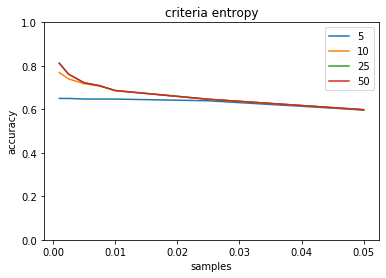

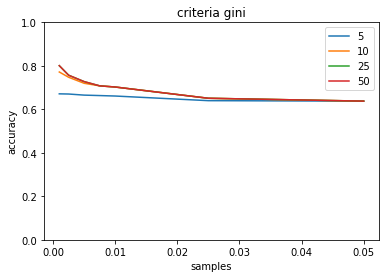

In [30]:

min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']



for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in min_samples_leaf:
            dt = tree.DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f)
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)
            yvalues.append(metrics.accuracy_score(y_test, y_pred))
        values[d] = yvalues
        plt.plot(min_samples_leaf, values[d])
        plt.title('criteria %s'%f)
        plt.xlabel('samples')
        plt.ylim((0,1))
        plt.ylabel('accuracy')
        plt.legend(max_depths)
    plt.show()

In [569]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=0.01)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cnf_mtx_dt = metrics.confusion_matrix(y_test, y_pred)
print(cnf_mtx_dt)
results["DecisionTreeClassifier"] = dt.score(X_train, y_train)
print(results["DecisionTreeClassifier"])

[[ 822  344    1    0   71   10  276]
 [ 321  794   34    0  206   93   19]
 [   0   22 1009   61    8  384    0]
 [   0    0   88  278    0   44    0]
 [  11  199   74    0 1030  120    0]
 [   0   16  391   18   30 1071    0]
 [ 111   17    0    0    2    0 1361]]
0.6885490700136095


# Random Forest (ensemble)

In [570]:
from sklearn.ensemble import RandomForestClassifier

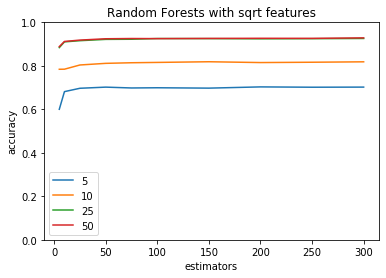

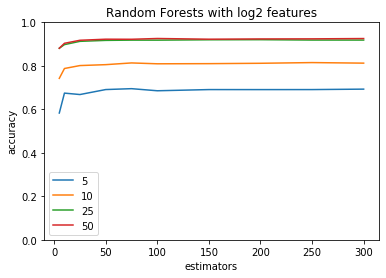

In [33]:


n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']


for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            yvalues.append(metrics.accuracy_score(y_test, y_pred))
        values[d] = yvalues
        plt.plot(n_estimators, values[d])
        plt.title('Random Forests with %s features'%f)
        plt.xlabel('estimators')
        plt.ylim((0,1))
        plt.ylabel('accuracy')
        plt.legend(max_depths)
    plt.show()    
        
        

In [572]:
rf = RandomForestClassifier(n_estimators=25, max_depth=25, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cnf_mtx_rf = metrics.confusion_matrix(y_test, y_pred)
print(cnf_mtx_rf)
results["RandomForestClassifier"] = rf.score(X_train, y_train)
print(results["RandomForestClassifier"])

[[1272  179    0    0   16    3   54]
 [ 197 1130   22    0   77   37    4]
 [   0    4 1330   21   13  116    0]
 [   0    0   28  366    0   16    0]
 [   1   23    9    0 1394    7    0]
 [   0    3   77    7    8 1431    0]
 [  24    0    0    0    0    0 1467]]
0.9965976107666717


# XGBoost

In [405]:
from sklearn.ensemble import GradientBoostingClassifier

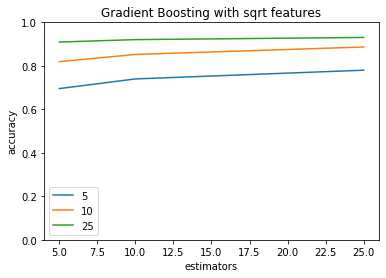

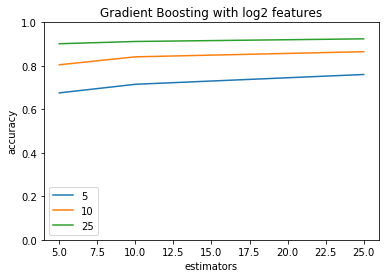

In [44]:


n_estimators = [5, 10, 25]
max_depths = [5, 10, 25]
max_features = ['sqrt', 'log2']


for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            gb = GradientBoostingClassifier(n_estimators=(n), max_depth=d, max_features=f)
            gb.fit(X_train, y_train)
            y_pred = gb.predict(X_test)
            yvalues.append(metrics.accuracy_score(y_test, y_pred))
        values[d] = yvalues
        plt.plot(n_estimators, values[d])
        plt.title('Gradient Boosting with %s features'%f)
        plt.xlabel('estimators')
        plt.ylim((0,1))
        plt.ylabel('accuracy')
        plt.legend(max_depths)
    plt.show()    

In [406]:
gb = GradientBoostingClassifier(n_estimators=5, max_depth=25, max_features='sqrt')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
cnf_mtx_gb = metrics.confusion_matrix(y_test, y_pred, labels)
print(cnf_mtx_gb)
results["GradientBoostingClassifier"] = rf.score(X_train, y_train)
print(results["GradientBoostingClassifier"])

[[1236  193    2    0    8    6   42]
 [ 169 1280   19    0   46   23    8]
 [   0    5 1366    8    8   85    0]
 [   0    0   27  368    0   13    0]
 [   5   21    9    0 1379    7    0]
 [   0   11   76    8    8 1390    0]
 [  14    0    0    0    0    0 1496]]
0.9979396642975956


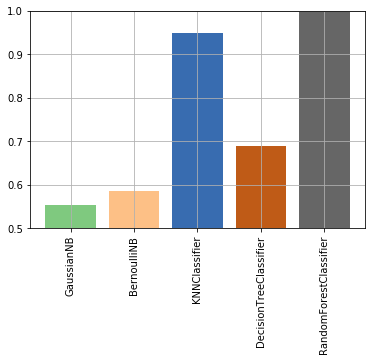

In [573]:
cm = matplotlib.cm.get_cmap("Accent")

plt.ylim(bottom=0.50, top=1)
plt.bar(range(len(results)), list(results.values()), align='center', color=cm(np.linspace(0, 1, len(results))))
plt.xticks(range(len(results)), list(results.keys()), rotation="vertical")
plt.grid()
plt.show()

# 5. Evaluation and critical analysis (30%)
A project that applies the suggested data mining techniques over the given datasets and provides a clear
and sound analysis of the collected results is not necessarily an excelling project.
Excelling projects have four major characteristics.
First, they show an acute understanding of the data characteristics and their impact on the learning.
Excelling projects formulate hypothesis behind differences in performance.
Second, they have precise and succinct language: no redundancies, unnecessary or subjective statements.
Third, excelling projects are often a result of a creative thinking on ways of improving the learning.
Illustrating, the justified use of a specific preprocessing technique (whether the inclusion of new features,
space transformations, handling of outliers or specific forms of noise) can make a difference.
Fourth, robust assessments go beyond simple performance indicators. Excelling projects draw (parametervarying) plots, test hypotheses, and establish ratios to understand less-trivial performance views such as
robustness to noise, domain adequacy or overfitting propensity.